<a href="https://colab.research.google.com/github/Sau05678/Unsupervised_netflix/blob/main/Netflix_Movies_and_Tv_Show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and Tv Shows

##### **Project Type**    - Unsupervised Regression Model
##### **Contribution**    - Individual
##### **Team Member 1 -** - Saurav kumar


# **Project Summary -**

Netflix offers a vast array of movies and TV shows spanning multiple genres and languages.Collaborations with top creators result in unique content. It has enormus number of TV Shows,Movies,Drama ,Comedy and many more.In this project i use K-Means alorithum to identifie 30 optimal conents clusters.America has most number of movies and shows.India and china watches lots of movies.its user-friendly interface and personalized recommendations. Netflix remains a streaming giant, shaping modern entertainment consumption.Regularly updating the library with fresh releases and classics maintains interest.Netflix can optimize its content for increased consumption and user satisfaction.

# **GitHub Link -**

https://github.com/Sau05678/Unsupervised_netflix

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
*   Is Netflix has increasingly focusing on TV rather than movies in recent
     years.
*   Clustering similar content by matching text-based features




.



# ***Let's Begin !***

**Importing all libraries**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding= 'unicode_escape')


In [ ]:
#top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# Checking the shape of the dataframe
df.shape

(7787, 12)

In [ ]:
# Columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

We have 12 columns

In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Data Description

Totale dataset contains a total of 7,787 rows and 12 columns. Here is the information about each column:

1. **Type:** it means "Movie" or "TV Show."
2. **Show_id:** Unique identifier for each show/movie.
3. **Cast:** Cast members of the show/movie (may contain missing values).
4. **Director:** Name of the director (may contain missing values).
5. **Title:** Title of the show/movie.
6. **country:** Country where the show/movie was produced (may contain missing
     values).
7. **date_added:** Date when the show/movie was added to Netflix (may contain
     missing values).
8. **release_year:** Year of release for the show/movie.
9. **rating:** Content rating for the show/movie (may contain missing values).
10. **duration:** Duration of the show/movie.
11. **description:** Brief description of the show/movie.
12. **listed_in:** Categories or genres the show/movie falls under.

The dataset has a mixture of data types - one integer column (release_year) and eleven object columns (strings). Some columns have missing values, such as director, cast, country, date_added, and rating. The memory usage for this dataset is approximately 730.2 KB.

# **Data processing**
---






In [ ]:
#Drop duplicates
df[df.duplicated()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


0 duplicated values

**Handling Null values**

In [ ]:
#Checking Null Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#total null values
df.isnull().sum().sum()

3631

The dataset contains a total of 3631 null values, distributed across various columns as follows: 2389 null values in the "director" column, 718 null values in the "cast" column, 507 null values in the "country" column, 10 null values in the "date_added" column, and 7 null values in the "rating" column. Addressing these null values is necessary to ensure the data's completeness and reliability before proceeding with any analysis or modeling tasks.

In [ ]:
#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **Exploratory data analysis(EDA)**
---

**1.Type**

In [ ]:
# Get the value counts for the 'type' column
type_counts = df['type'].value_counts()

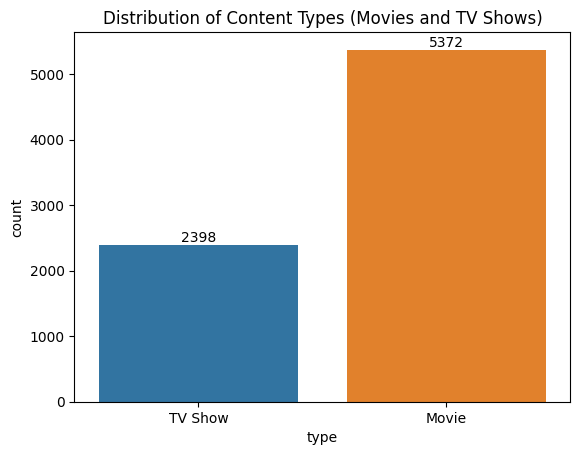

In [ ]:
# Get the value counts for the 'type' column
type_counts = df['type'].value_counts()

# # Create a bar plot using Seaborn
# sns.barplot(x=type_counts.index, y=type_counts.values)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types (Movies and TV Shows)')

ax = sns.countplot(x='type',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

# Show the plot
plt.show()

Netflix has 5377 movies and 2410 TV shows,
there are more   number movies on Netflix than TV shows.



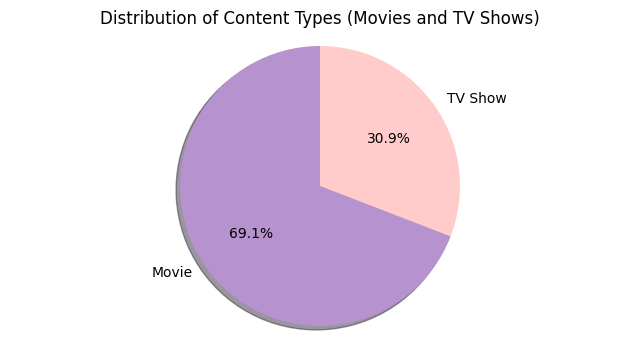

In [ ]:
# Get the value counts for the 'type' column
type_counts = df['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, shadow=True,colors =['#B692CF','#FFCCCB'])

# Add title
plt.title('Distribution of Content Types (Movies and TV Shows)')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**2.ratings**

In [ ]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)


In [ ]:

df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [ ]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

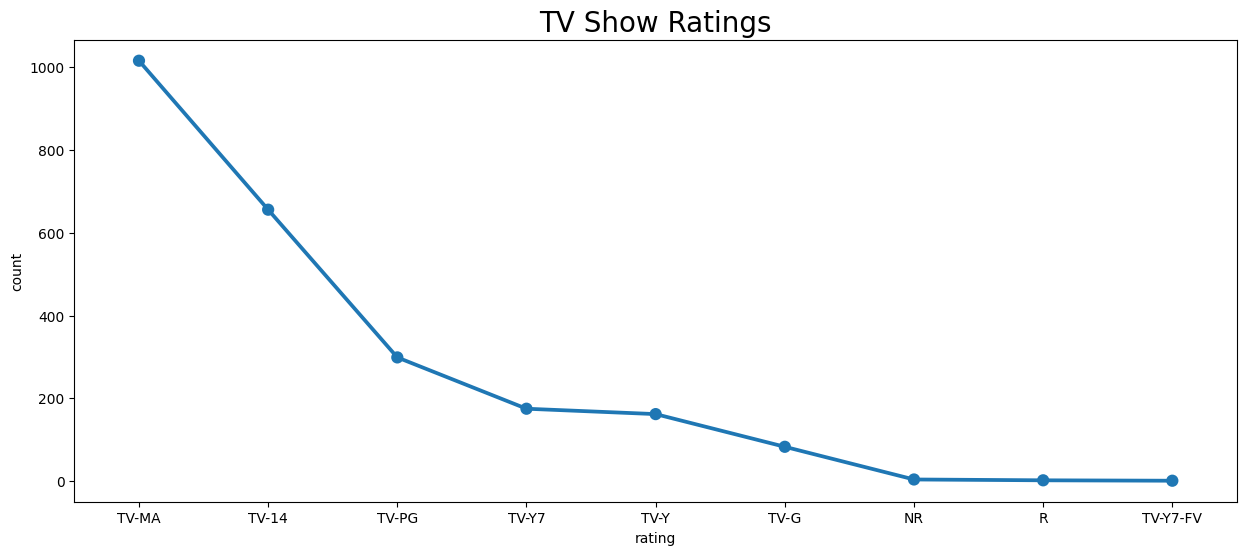

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

Bar graph displays TV Show Ratings count, making it easy to compare ratings' popularity and prevalence among shows on Netflix.

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

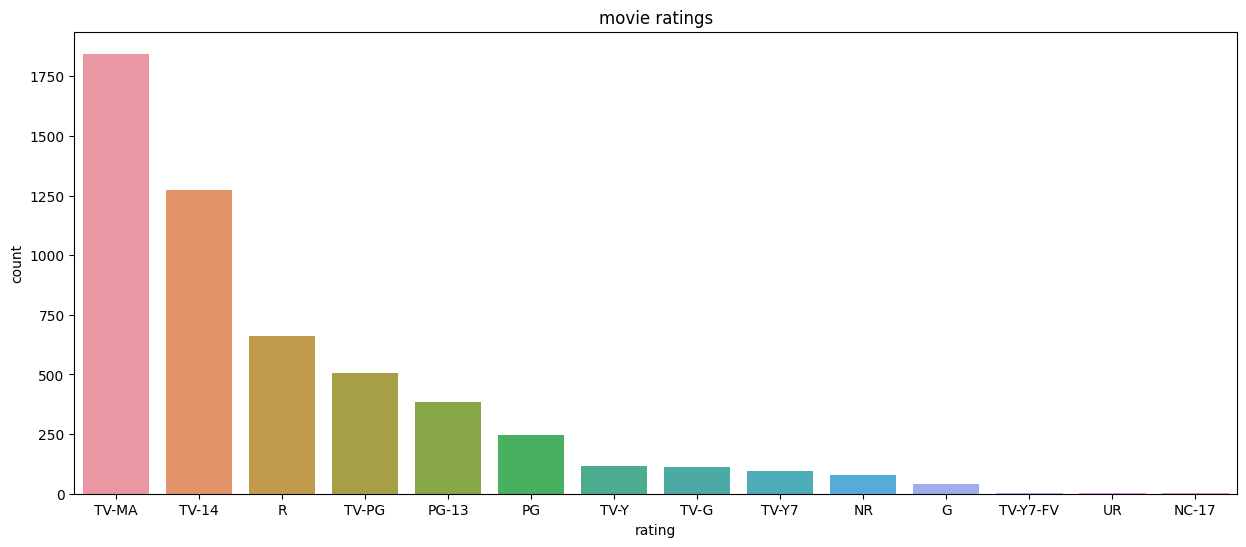

In [ ]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(15,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],data=movies,order=movies['rating'].value_counts().index)

TV-MA has the highest number of ratings for tv shows i,e adult ratings
in both the cases TV-MA has the highest number of ratings

**3.Release_year**

In [ ]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)


In [ ]:
movies_year

2021     12
2020    411
2019    582
2018    734
2017    742
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [ ]:
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)


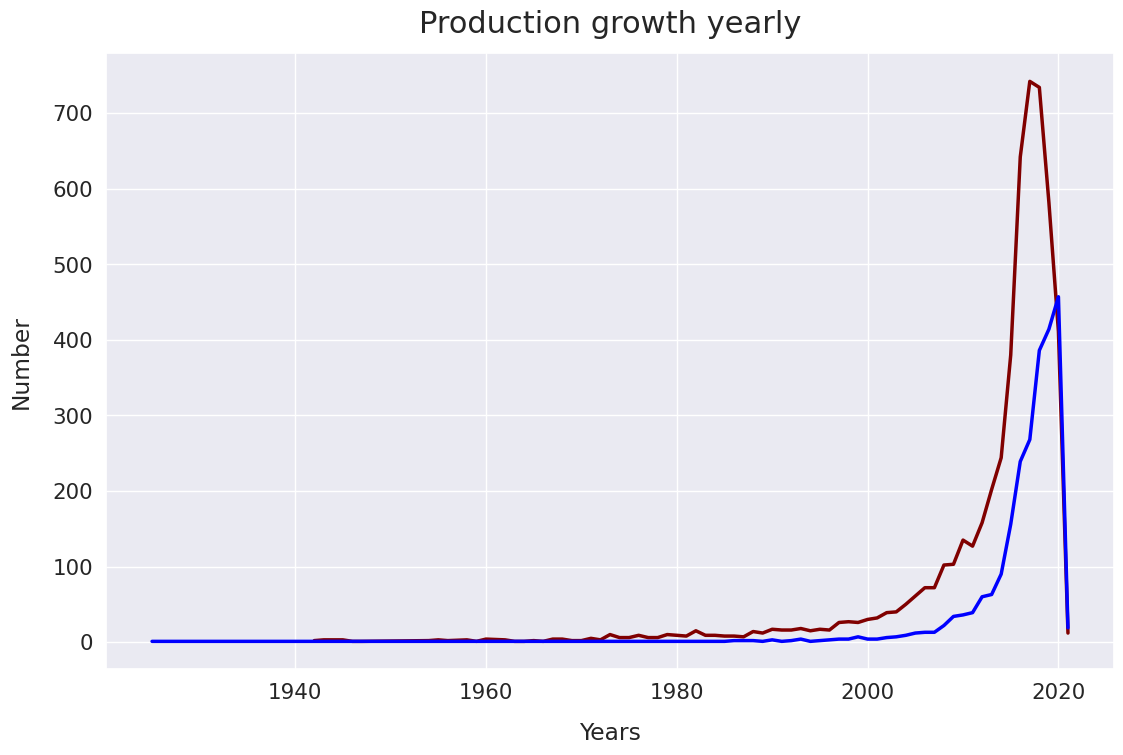

In [ ]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(13, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(13, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=14)
plt.ylabel("Number", labelpad=14)
plt.title("Production growth yearly", y=1.02, fontsize=22);

<Axes: xlabel='count', ylabel='release_year'>

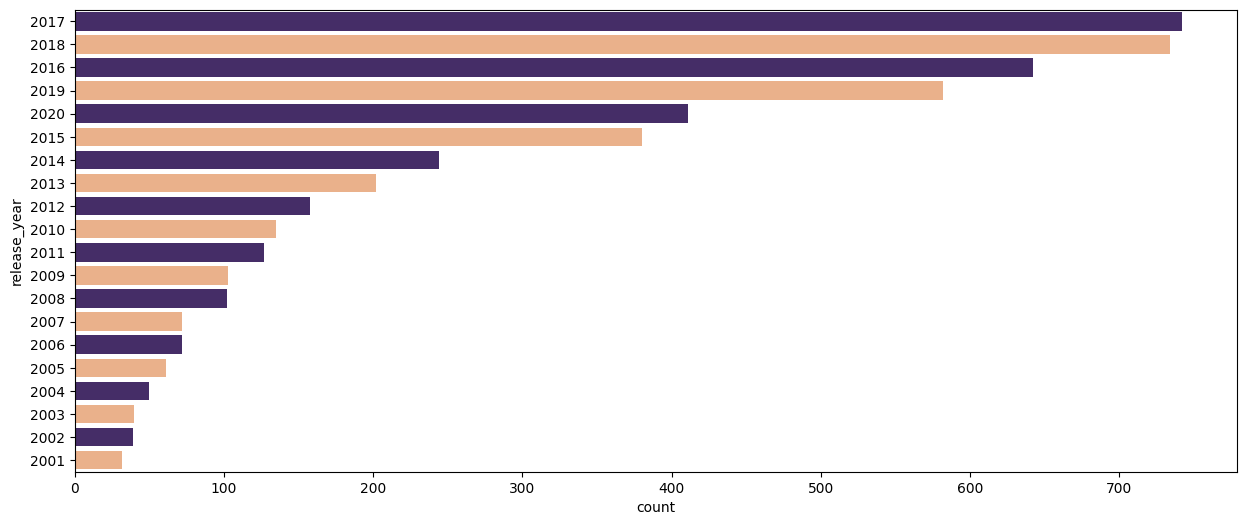

In [ ]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,6))
sns.countplot(y=movies['release_year'],palette=['#432371',"#FAAE7B"],data=df,order=movies['release_year'].value_counts().index[0:20])


highest number of movies released in 2017 and 2018

In [ ]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


In [ ]:
#adding columns of month and year of addition

df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


**4.Release_month**

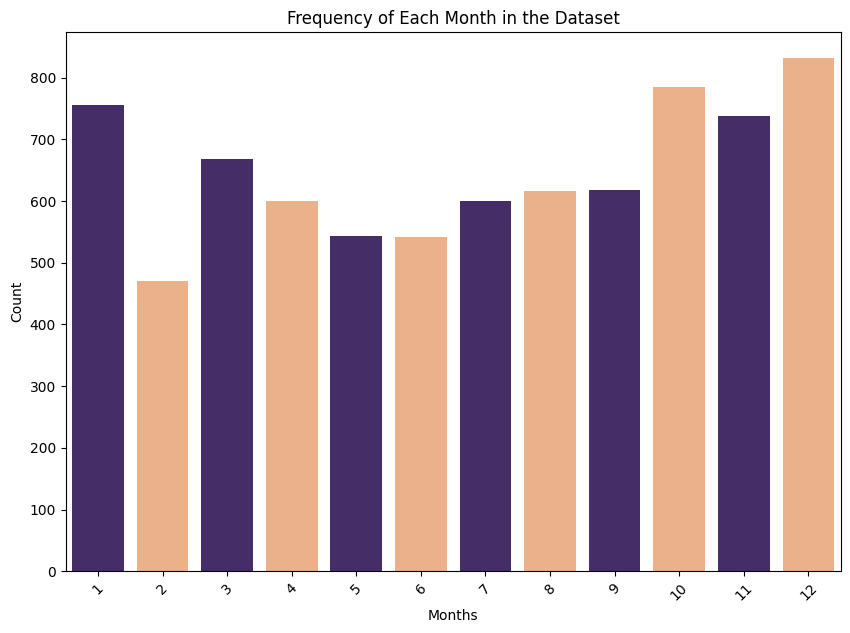

In [ ]:
# Plotting the Countplot
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='month',palette=['#432371',"#FAAE7B"], data=df)

# Adding labels and title
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Frequency of Each Month in the Dataset')

# Rotating x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

From October to January, maximum number of movies and TV shows content were added.


The above graph shows that the most content is added to Netflix from october to january

**5.genre**

<Axes: title={'center': 'Top 20 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

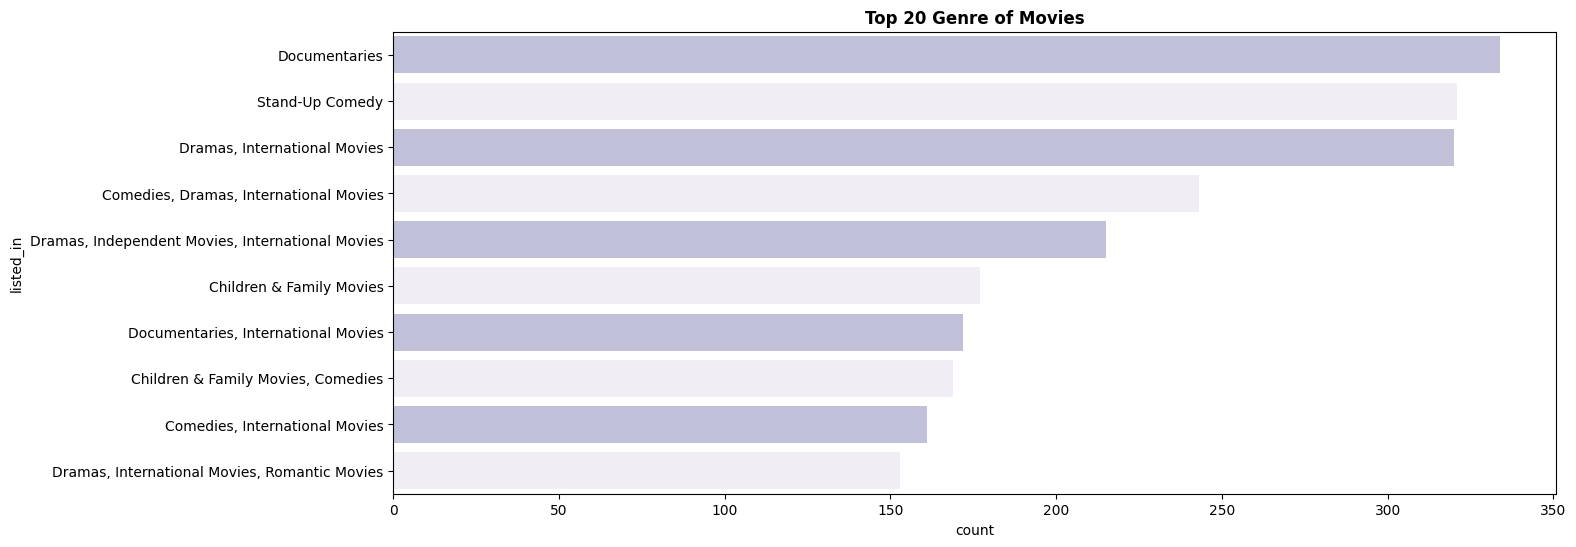

In [ ]:
#Analysing top10 genre of the movies
plt.figure(figsize=(15,6))
plt.title('Top 20 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'], palette=["#bcbddc", "#efedf5"],data=movies,order=movies['listed_in'].value_counts().index[0:10])

Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

<Axes: title={'center': 'Top 20 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

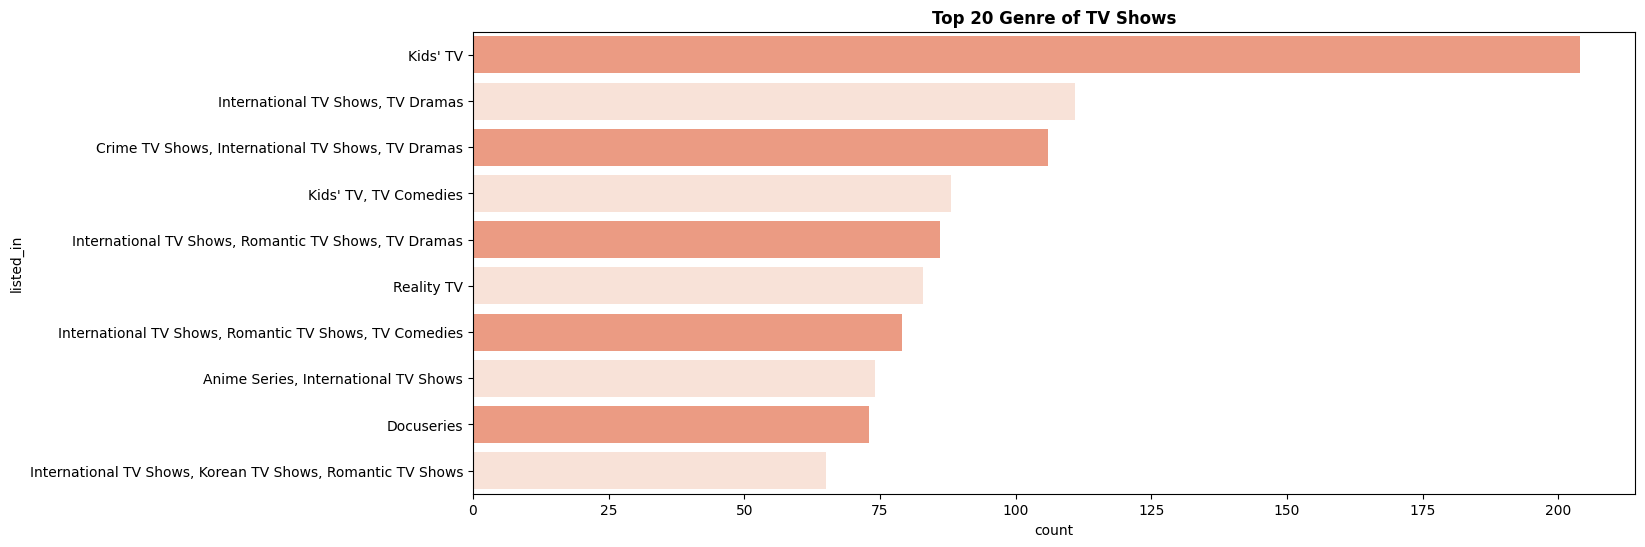

In [ ]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(15,6))
plt.title('Top 20 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],palette=["#fc9272","#fee0d2"],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

kids tv is the top most  TV show genre in netflix

**6.Duration**

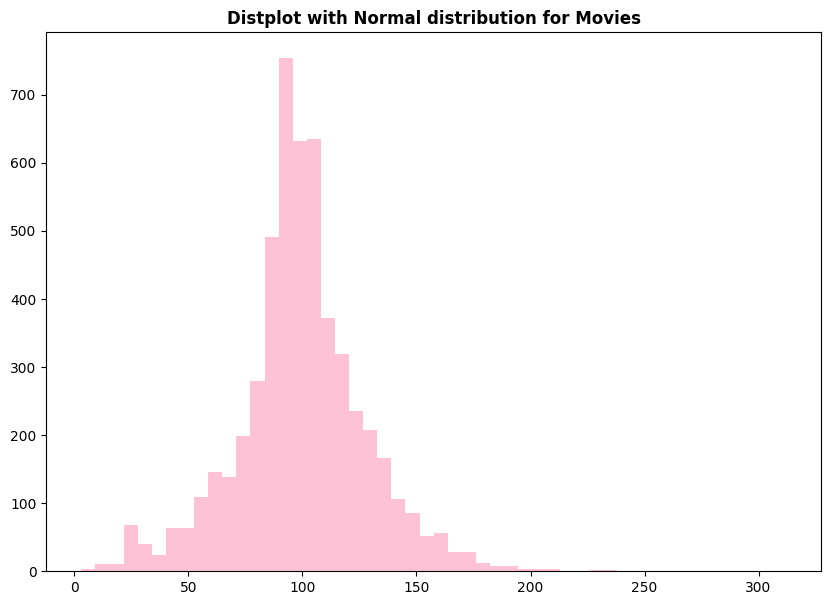

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['#ff6699'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

most of the movies have duration of between 50 to 150

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

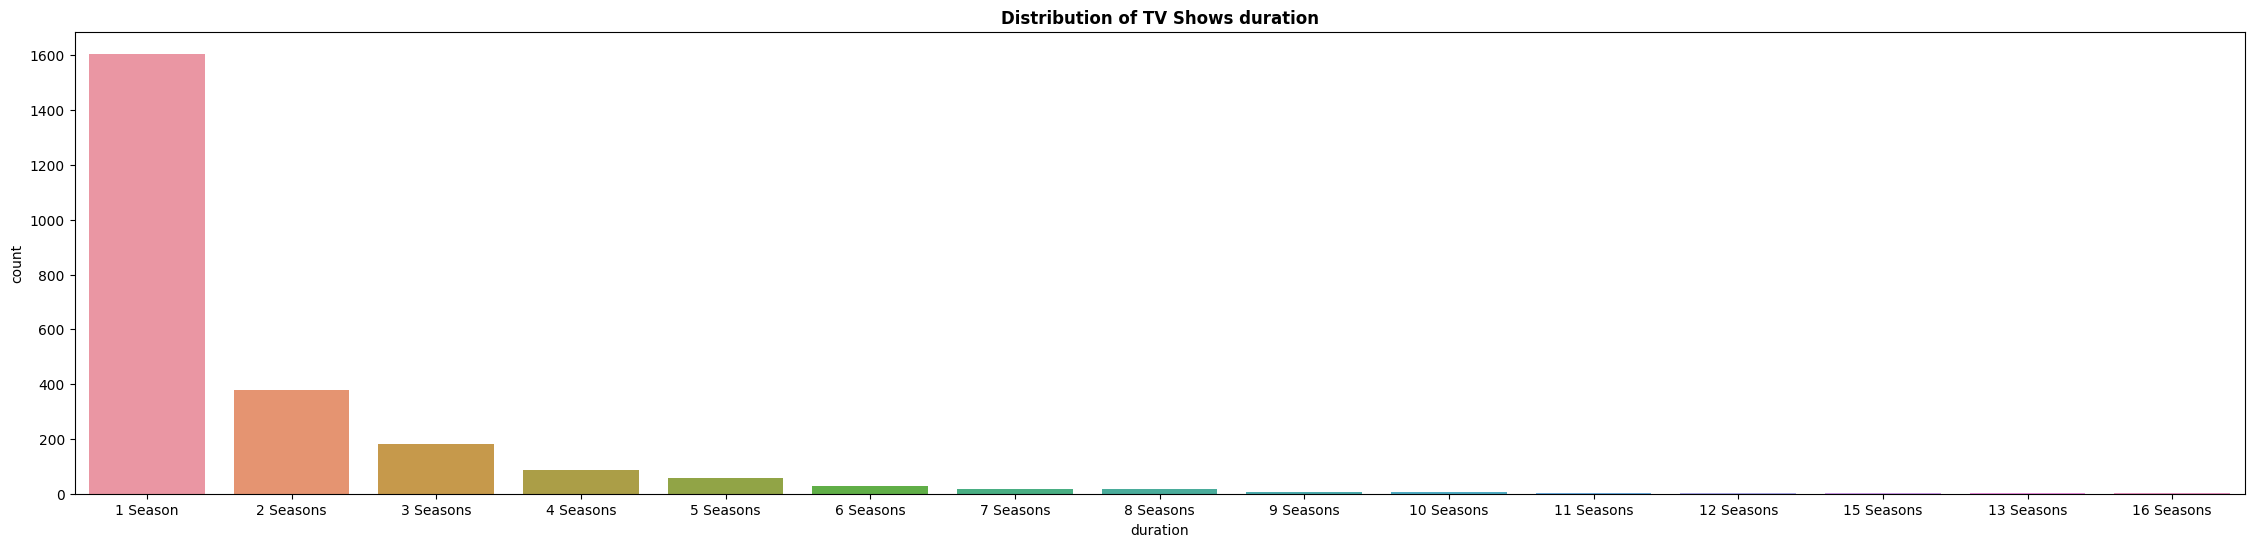

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(28,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)


highest number of tv_shows consistig of single season

Those movies that have a rating of NC-17 have the longest average duration.

When it comes to movies having a TV-Y rating, they have the shortest runtime on average

**7.country**

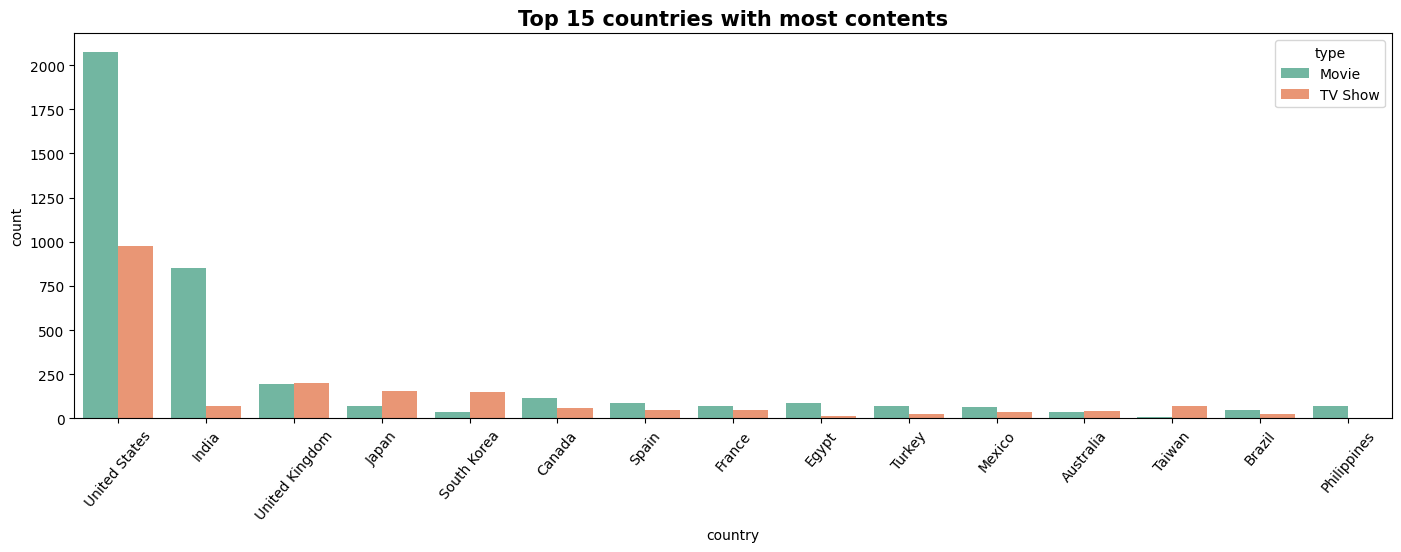

In [ ]:
#Analysing top15 countries with most content
plt.figure(figsize=(17,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'],palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

unitated states has the highest number of content on the netflix ,followed by india

In [ ]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country


,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


<BarContainer object of 11 artists>

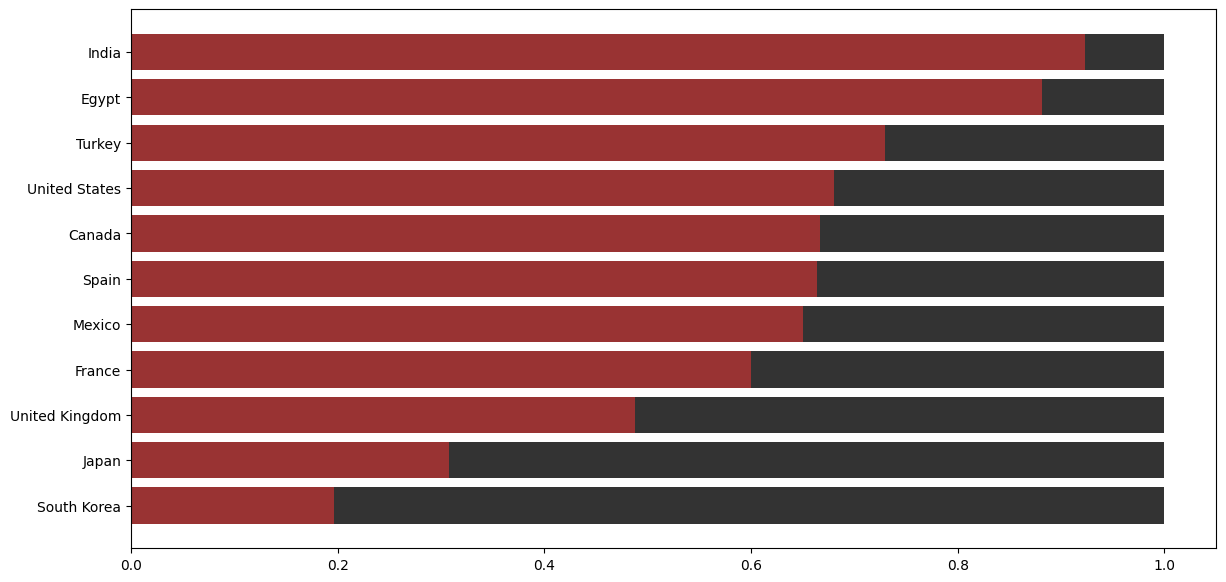

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(14, 7),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='#800000', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

india has highest number of movies in netflix

**8.Originals**

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10


In the dataset, we can observe a distinction between two types of content:

* Some movies and TV shows were originally released outside of Netflix, and they were subsequently added to the platform at a later date.

* However, there are also movies and TV shows that were created and released exclusively on Netflix, and these are referred to as "Netflix Originals."

The term "Netflix Originals" is used to label content that is produced or commissioned by Netflix, meaning it is exclusive to the platform and not available elsewhere. This label helps viewers identify and recognize content that is unique to Netflix's library, showcasing the platform's original and exclusive productions.

([<matplotlib.patches.Wedge at 0x7f3541f21030>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.8900699117813856, 0.6463555926434587, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.485492679153483, 0.35255759598734104, '30.01%')])

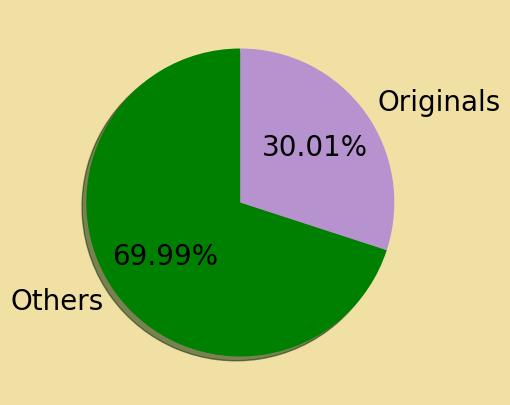

In [ ]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#F1E0A4")
ax.patch.set_facecolor('#267B35')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['#008000','#B692CF'])

30% movies released on Netflix.
70% movies added on Netflix were released earlier by different mode.

**1.HYPOTHESIS TESTING**
*   HO:movies rated for kids and older kids are at least two hours long.
*   H1:movies rated for kids and older kids are not at least two hours long.



In [ ]:
movies

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,2020
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,2020
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,2019
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,2020


In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens


In [ ]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

**Hypothesis Testing**
*    H1:The duration which is more than 90 mins are  movies
*   HO:The duration which is more than 90 mins are NOT movies



In [ ]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


In [ ]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [ ]:

df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [ ]:

#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [ ]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)


-1.9602687544602204

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

# Feature engineering

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7787, dtype: object

In [ ]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [ ]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [ ]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7787, 5000)

In [ ]:
# convert X into array form for clustering
X = X_tfidf.toarray()

# clustering algorithms

**1.K-Mean Algorithum**

Finding the optimal number of clusters using the elbow method

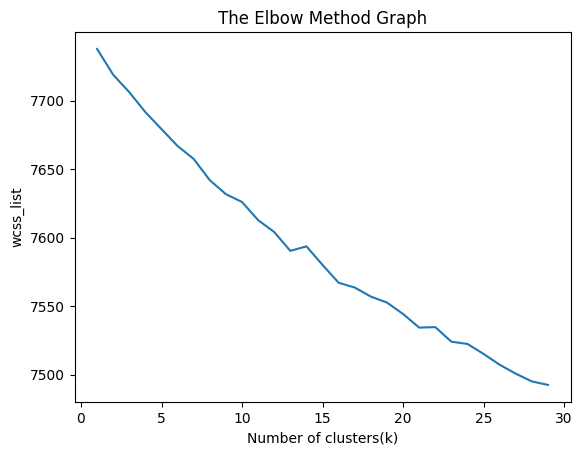

In [ ]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

from elbow and sillhoute score ,forming 29 number of clusters

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 28, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

**Evaluation**

In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.008475516444445

In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:
df['cluster'].value_counts()

17    2472
7      436
23     300
18     296
14     293
9      291
3      264
4      258
8      240
24     223
25     219
19     217
21     202
10     199
16     189
26     177
0      171
1      155
20     147
22     141
15     138
6      125
13     114
11     112
12     111
2      101
5       94
27      85
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

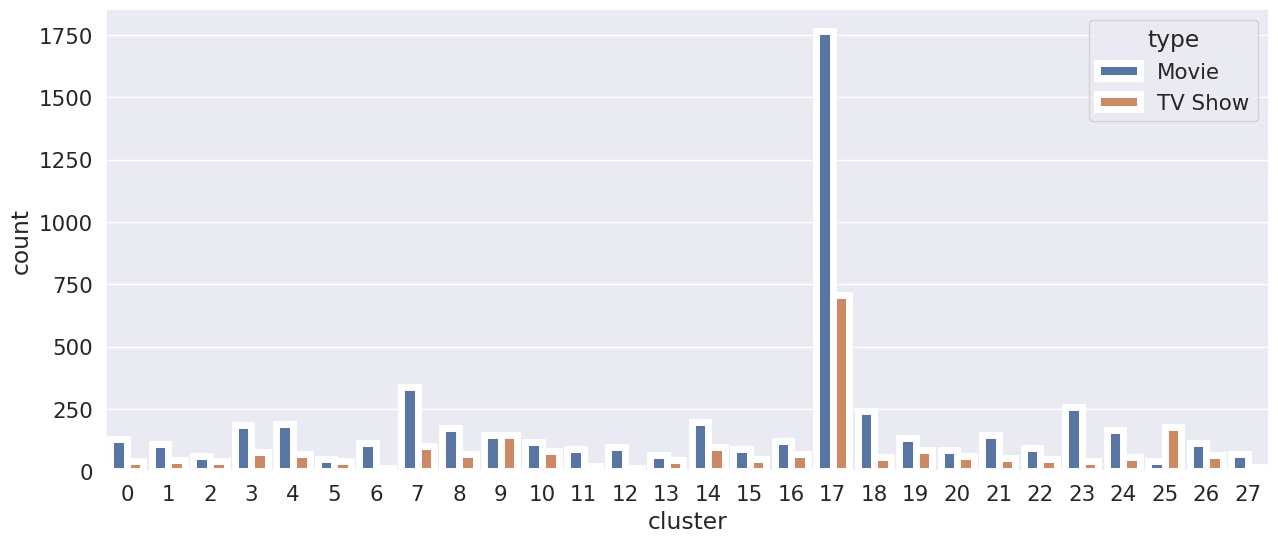

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

cluster 0 has the highest number of datapoints

**Dendogram**

**2.AgglomerativeClustering**

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,8,1,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,12,1,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,12,1,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,11,1,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,1,1,0


**Evaluation**

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

13.979382092977453

# **CONCLUSION**

---

* Approximately 31% of the movies available on Netflix are original releases,
  while the remaining 70% were previously released through other distribution
  channels, indicating a mix of original and acquired content.
* For TV shows, the top genre on Netflix is Kids TV, indicating a strong
  emphasis on children's content.

* The India and London has the highest number of content on Netflix, followed
  by India, highlighting the global appeal of the platform.

* Content addition on Netflix is most active during the months from October to
  January, suggesting a seasonal pattern in new content availability.

* Total number of TV Shows are approx 2400 and Numbers of Movies including are
  5400 approx.The platform hosts more movies than TV shows, indicating a      higher focus on movie content.
* Movies with an NC-17 rating have the longest average duration, whereas movies
  rated TV-Y have the shortest average runtime.

* Documentaries are the most prominent genre on Netflix, followed by Standup
  Comedy and Drama. Additionally, International Movies are well-represented on the platform.

* Netflix features a significant number of TV shows consisting of a single
  season, suggesting a variety of limited-series and mini-series content.

* Duration Time of Movies and TV Shows are ranging between 50 to 150 minutes,
  provides vast range of viewing experience.




#**Future Benefits of this project:**

* Personalized Recommendations: By clustering similar movies and TV shows based on various factors such as genre, themes, and viewer preferences, Netflix can provide more accurate and personalized recommendations to its users. This tailored content delivery fosters a deeper engagement, as viewers are more likely to discover and enjoy content aligned with their tastes.
* Enhanced User Experience: Clustering facilitates a smoother and more intuitive user interface. With content grouped into meaningful clusters, users can navigate the vast library more efficiently, saving time and frustration. This streamlined experience encourages users to explore a broader range of content that they might have overlooked otherwise.
* Effective Content Catalog Management: Clustering assists Netflix in managing its extensive content catalog efficiently. It simplifies content organization, allowing the platform to categorize, update, and present content more dynamically. This agility is crucial as new content is added and older content is rotated out.
* Competitive Edge: Implementing sophisticated clustering techniques provides Netflix with a competitive edge in the streaming industry. It sets the platform apart by offering a more sophisticated and personalized viewing experience, which can attract and retain a loyal user base.
* Improved Content Curation: Content managers and platform administrators can use clustering to curate specialized collections or thematic playlists. This curation helps highlight specific genres, themes, or moods, catering to different audience segments and ensuring that a wider range of content is showcased effectively.